In [27]:
from mpmath import zeta
from scipy.stats import gumbel_r
import numpy as np 
import sympy
import matplotlib.pyplot as plt 
import pyprimes
import seaborn as sns

In [2]:
# Developed Libraries
from Zeta_Algorithms import zetaStochastic, zetaNormRange

## <h1><center> NUMERICAL STUDY OF THE LARGE VALUES OF THE RIEMANN ZETA FUNCTION SUPERVISED BY PROF. L.P. ARGUIN </center></h1>

**Objectives The goal is to develop numerical methods to verify and extend conjectures about the large values of the Riemann zeta function in short intervals. The [Riemann Zeta](https://en.wikipedia.org/wiki/Riemann_zeta_function) function is defined as:**

$$\zeta(s):=\sum_{n=1}^\infty{n^{-s}} \ \ \ \ : \ (s=\sigma + it) \ \ ; \ (\sigma > 1)$$

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

In [83]:
try:
    # ideally prime numbers should be calculated externally or stored in a txt file
    print('File found, returning prime list...')
    text_file = open("prime.txt", "r")
    prime_num = np.array(list(map(lambda x: int(x), text_file.read().split(',')[:-1])))
    print("Primes returned up to", prime_num[-1])
    
except FileNotFoundError:
    print('File not found, generating prime list...')
    
    # Stores prime list up to 10^8 (ideally should hold 10^50)
    prime_num = np.array(list(pyprimes.primes_below(1e8)))
    
    # store the prime number list in a text file (temporary)
    f = open("prime.txt", "w")
    for i in prime_num:
        f.write("{},".format(str(i)))
    f.close()
    
    text_file = open("prime.txt", "r")
    prime_num = np.array(list(map(lambda x: int(x), text_file.read().split(',')[:-1])))
    print("Primes returned up to", prime_num[-1])

File found, returning prime list...
Primes returned up to 99999989


### A model for large values of $log(\zeta)$

Our Zeta Stochastic Function is defined $(\ X_T(h),\  h\in I)$, with $I\in [-1,1]$
$$X_T(h) = \sum_{p\leq T}\cdot \frac{1}{\sqrt{p}}Re(p^{ih}e^{i\theta_p})$$
Where $p$ refers to the primes, $Re$ is concerned with the 'real' part of the expression $p^{ih}e^{i\theta_p}$ and $\theta_p \sim U(0,2\pi) \ IID$ and indexed by primes

Through Euler's method we have the following realization
$$X_T(h) = \sum_{p\leq T}\cdot \frac{1}{\sqrt{p}}cos(\theta_p - hlog(p))$$

In [84]:
# value of T placed at 10^7 (ideally taken should be taken 10^15, 10^25, etc)
T_val = int(1e6)

# create range interval of h from -1 to 1 (points at every 1/log(T))
x=np.arange(-1,1,1/np.round(np.log(T_val)))

In [85]:
x

array([-1.00000000e+00, -9.28571429e-01, -8.57142857e-01, -7.85714286e-01,
       -7.14285714e-01, -6.42857143e-01, -5.71428571e-01, -5.00000000e-01,
       -4.28571429e-01, -3.57142857e-01, -2.85714286e-01, -2.14285714e-01,
       -1.42857143e-01, -7.14285714e-02, -4.44089210e-16,  7.14285714e-02,
        1.42857143e-01,  2.14285714e-01,  2.85714286e-01,  3.57142857e-01,
        4.28571429e-01,  5.00000000e-01,  5.71428571e-01,  6.42857143e-01,
        7.14285714e-01,  7.85714286e-01,  8.57142857e-01,  9.28571429e-01])

In [ ]:
# create stochastic zeta range over h interval  
sims = 100
y = np.array([[zetaStochastic(h=i, T=T_val, prime_list=prime_num) for i in x] for _ in range(sims)]).reshape(sims, x.size)

In [ ]:
y

In [ ]:
# rolling maximum of norm function
# maximum = [y[:, :i+1].max() for i in range(y.shape[1])]

# rolling minimum of norm function
# minimum = [y[:, :i+1].min() for i in range(y.shape[1])]

In [ ]:
plt.figure(figsize=(20,10))  
plt.title("{} Simulations of the Stochastic Zeta Function".format(sims), loc='left', size=14)
for i in y:
    plt.plot(x, i)
plt.plot(x, np.average(y, axis=0), lw=4, color='black', label='Rolling Average', ls='--')
# plt.plot(x, maximum, lw=2, color='red', ls='--', label='Rolling Maximum')
# plt.plot(x, minimum, lw=2, color='red', ls='--', label='Rolling Minimum')

plt.ylabel('Log Zeta Stochastic Value')
plt.xlabel('$h$ value')
plt.legend()
plt.show()

**Conjecture**

We assert that the maxium of the stochastic function should be defined as follows:
$$max_{|h|<1}X_t(h)\approx log(log(T)) - \frac{3}{4}log(log(log(T)))$$
Abbreviating the log expressions, we underscore each log with the number of succesive logs taken of the value $T$ below
$$max_{|h|<1}X_t(h)\approx log_2(T)) - \frac{3}{4}log_3(T)))$$

In [ ]:
cong_max = np.log(np.log(T_val)) - 0.75*np.log(np.log(np.log(T_val)))
print("Our simulated maximum was    ->", np.average(y.max(axis=1)))
print("Conjecture maximum should be ->", cong_max)

**Function Variation**

To measure the degree of variation expected with the simulation for large values of Zeta, we need to consider extreme statistics for determining the extent of our model's variation. We begin by recentering our stochastic model as follows: 
$$\Theta = max_{|h|<1}X_t(h) - (log_2(T) - \frac{3}{4}log_3(T))$$
We say that our $\Theta$ follows a [Gumbel distribution](https://en.wikipedia.org/wiki/Gumbel_distribution), defined below
$$P(\Theta < x)=exp(-ce^{-2x}) \, \ \ \  \mu = 0 \ , \ \ \beta = \frac{1}{2}$$ 
Our variance measure is then:
$$Var(\Theta)=\frac{\pi^2}{6}\beta^2=\frac{\pi^2}{24}$$

Hence, in our case our expression for the maximum of our stochastic process introduces and error term: 
$$log_2(T) - \frac{3}{4}log_3(T) + (Gumbel)$$

In [ ]:
plt.figure(figsize=(20, 8))
plt.hist(y.max(axis=1), bins=50, alpha=0.5, color='orange', density=True, 
         label="Stochastic Zeta Maximums")
plt.hist(cong_max + gumbel_r.rvs(loc=0, scale=0.5, size=1000), bins=50, alpha=0.3, color='blue', 
         label="Gumbel Distribution $\Theta \sim (0,1/2)$", density=True)
plt.hist(gumbel_r.rvs(loc=0, scale=(np.pi**2)/24, size=1000), bins=50, alpha=0.3, color='red', 
         label="Gumbel Distribution $\Theta \sim (0,(np.pi**2)/24)$", density=True)
plt.legend()
plt.show()

### Fyodorov-Hiary-Keating Conjecture

**Conjecture (Fyodorov-Hiary-Keating '12)'**

if $\tau\sim Unif(T,2T)$, then as $T \rightarrow \infty$
$$max_{|h|<1}|\zeta(1/2 + i(\tau +h))| = \frac{log(T)}{log(log(T))^{3/4}}$$
Using the same log convention discussed earlier we have 
$$max_{|h|<1}|\zeta(1/2 + i(\tau +h))| = \frac{log(T)}{log_2(T))^{3/4}}$$

In [63]:
N = 0   # starting value of T range 
deltaN = 500    # length of T range

In [64]:
# creating the interval range t
t_range=np.arange(N, N+deltaN)

In [65]:
# storage for the normal zeta 
norm_zeta_value = zetaNormRange(N, deltaN)

# rolling average of norm function 
average = np.cumsum(norm_zeta_value)/(t_range+1)

# rolling maximum of norm function
maximum = [norm_zeta_value[:i+1].max() for i in range(norm_zeta_value.size)]

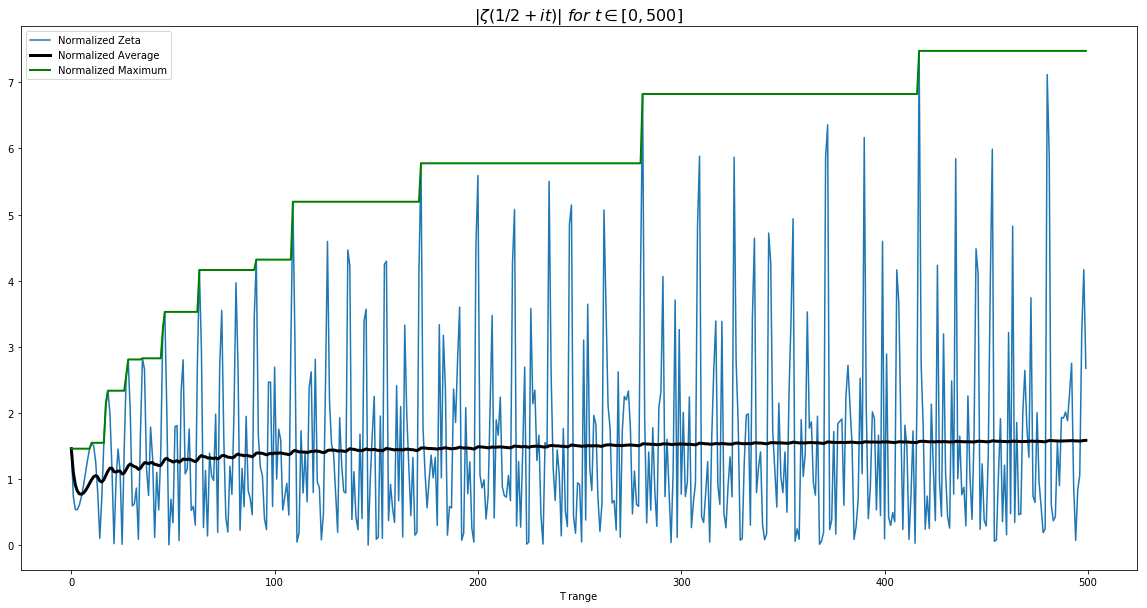

In [70]:
plt.figure(figsize=(20,10))  
plt.title('$|\zeta(1/2 + it)| \ for \ t\in [{},{}]$'.format(N, N+deltaN), size=16)
plt.plot(t_range, norm_zeta_value, label='Normalized Zeta')
plt.plot(t_range, average, label='Normalized Average', lw=3, color='black')
plt.plot(t_range, maximum, label='Normalized Maximum', lw=2, color='green')
plt.xlabel('T range')
plt.legend()
plt.show()